<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
import requests
import csv
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE, "r") as arquivo:
  conteudo = arquivo.read()

fonte = BeautifulSoup(conteudo, 'lxml')


In [ ]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [ ]:
# manipule os dados
def extrair_dados_por_tag(arquivo,tag):
    elementos = arquivo.find_all(tag)
    dados = [elemento.string for elemento in elementos]
    return dados

# continue o codigo aqui
estados = extrair_dados_por_tag(fonte,"nome")
siglas = extrair_dados_por_tag(fonte,"sigla")
regioes = extrair_dados_por_tag(fonte,"regiao")


print(estados)
print(siglas)
print(regioes)


['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui

estados_df = pd.DataFrame({'estado': estados, 'sigla': siglas, 'regiao': regioes})

estados_df.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False, encoding='Utf-8')


In [ ]:
estados_df.describe()

,estado,sigla,regiao
count,27,27,27
unique,27,27,5
top,ACRE,AC,NORDESTE
freq,1,1,9


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)

In [ ]:
# visualize os resultados
fonte.head(n=3)

# continue o codigo aqui

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...


In [ ]:
fonte.groupby('Censo').count()

,FID,gid,UF,nome,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
Censo,,,,,,,,,,,
2007.0,5,5,5,5,5,5,5,5,5,5,5
2010.0,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555


In [ ]:
# manipule os dados
cidades_df = fonte.query('Censo == 2010.0')[['UF','nome','Pop_est_2009','PIB','PIB_percapita']]


# continue o codigo aqui

# renomeando os nomes das colunas
cabecalho = {'UF':'estado','nome':'cidade','Pop_est_2009':'populacao','PIB':'pib','PIB_percapita':'pib_percapita'}
cidades_df.rename(columns=cabecalho, inplace=True)

cidades_df.head(n=3)



,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844


In [ ]:
# Etapa de remoção de acentuação para facilitar a combinação dos dataframes no próximo exercício:

cidades_df['estado'] = cidades_df['estado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cidades_df.head(n=10)

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUI,Nazária,7895,2.095138e+04,2653.750000
5,MINAS GERAIS,Pedra Azul,26000,1.875237e+05,7212.450195
6,PIAUI,Teresina,802537,8.700461e+06,10841.200195
7,PIAUI,Amarante,17892,6.532289e+04,3650.949951
8,GOIAS,Matrinchã,4420,4.591055e+04,10387.000000
9,PERNAMBUCO,Cachoeirinha,18123,8.043380e+04,4438.220215


In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui

cidades_df.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False, encoding='Utf-8')

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3
dados_brasil_df = pd.merge(right=cidades_df, left=estados_df, on='estado',how= 'inner')
dados_brasil_df.head(n=3)

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,109181.867188,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,217153.859375,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,48347.300781,8538.910156


In [ ]:
dados_brasil_df.shape

(5555, 7)

In [ ]:
dados_brasil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5555 non-null   object 
 1   sigla          5555 non-null   object 
 2   regiao         5555 non-null   object 
 3   cidade         5555 non-null   object 
 4   populacao      5555 non-null   int64  
 5   pib            5555 non-null   float64
 6   pib_percapita  5555 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 303.9+ KB


In [ ]:
dados_brasil_df.describe()

,populacao,pib,pib_percapita
count,5.555000e+03,5.555000e+03,5555.000000
mean,3.441515e+04,5.825674e+05,10981.193570
std,2.019830e+05,6.352060e+06,12159.333813
min,8.370000e+02,5.770282e+03,1929.969971
25%,5.337000e+03,3.839037e+04,4516.020020
50%,1.117000e+04,8.049153e+04,8391.370117
75%,2.323100e+04,2.056722e+05,13317.935059
max,1.103759e+07,3.893172e+08,360815.843750


In [ ]:
dados_brasil_df.isnull().any().any()

False

In [ ]:
NOME_ARQUIVO_DESTINO = 'brasil.csv'

dados_brasil_df.to_csv(NOME_ARQUIVO_DESTINO, index=False , encoding='Utf-8' )

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1
NOME_ARQUIVO_FONTE = 'brasil.csv'

brasil_df = pd.read_csv(NOME_ARQUIVO_FONTE)

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta
top10 = brasil_df.sort_values(by='populacao', ascending=False).head(n=10)
top10[['cidade','populacao']]

,cidade,populacao
4403,São Paulo,11037593
2747,Rio de Janeiro,6186710
246,Salvador,2998056
802,Brasília,2606885
766,Fortaleza,2505552
5447,Belo Horizonte,2452617
2056,Curitiba,1851215
142,Manaus,1738641
2446,Recife,1561659
1687,Belém,1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta
top_nordeste = brasil_df.query('regiao == "NORDESTE"').sort_values(by='pib_percapita', ascending=True).head(n=5)
top_nordeste[['cidade','pib_percapita','sigla']]

,cidade,pib_percapita,sigla
1319,São Vicente Ferrer,1929.969971,MA
1214,Cajapió,2203.830078,MA
2512,Dom Inocêncio,2358.239990,PI
1338,Timbiras,2368.159912,MA
1235,Axixá,2416.969971,MA


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta
top_sp = brasil_df.query('sigla == "SP"').sort_values(by='pib', ascending=False).head(n=15)
top_sp[['cidade','pib']]

,cidade,pib
4403,São Paulo,389317152.0
4355,Guarulhos,32473828.0
4472,Campinas,31654720.0
4238,Osasco,31616452.0
3942,São Bernardo do Campo,28935768.0
4476,Barueri,26908070.0
3900,Santos,22546134.0
4126,São José dos Campos,22018042.0
4146,Jundiaí,16585137.0
3948,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta
pib_sc = brasil_df.query('sigla == "SC"')[['pib']].sum()
variavel = pib_sc.values[0]
print(f'PIB de Santa Catarina: {variavel:.2f}')

PIB de Santa Catarina: 129806256.75


 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
pop_sul = brasil_df.query('regiao == "SUL"')[['populacao']].sum()
variavel = pop_sul.values[0]
print(f'População da região sul: {variavel:.2f}')

População da região sul: 27719118.00


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
pib_ms = brasil_df.query('sigla == "MS"')[['pib_percapita']].mean()
variavel = pib_ms.values[0]
print(f'PIB per capita médio das cidades do Mato Grosso do Sul: {variavel:.2f}')

PIB per capita médio das cidades do Mato Grosso do Sul: 14458.90


 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta
pop_brasil = brasil_df['populacao'].sum()
print(f'População do Brasil em 2010: {pop_brasil:.2f} de pessoas.')

População do Brasil em 2010: 191176146.00 de pessoas.


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [ ]:
# código para gerar a visualização
cidades_menos_df = brasil_df[['populacao','cidade']].sort_values(by='populacao', ascending=True).head(n=10)
cidades_menos_df.head(n=3)

,populacao,cidade
4356,837,Borá
5197,890,Serra da Saudade
1097,1018,Anhanguera


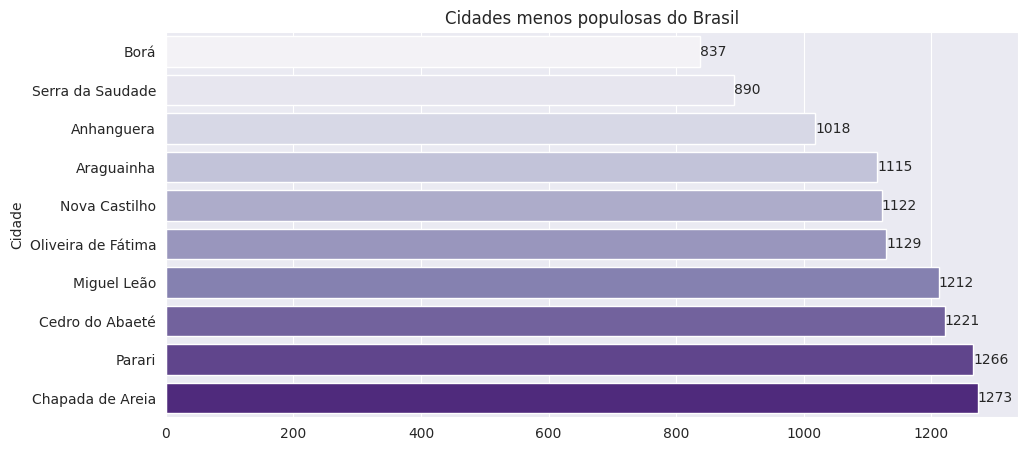

In [ ]:
with sns.axes_style('darkgrid'):
  fig , axis = plt.subplots(figsize=(11,5))
  fig = sns.barplot(
      data=cidades_menos_df,
      y='cidade',
      x='populacao',
      palette ='Purples',
      ax=axis,
      hue='cidade',
      orient='h',

      )
  fig.set_title('Cidades menos populosas do Brasil')
  fig.set_xlabel('')
  fig.set_ylabel('Cidade')

  for container in fig.containers:
    fig.bar_label(container)


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [ ]:
# código para gerar a visualização
populacao_por_regiao = brasil_df.groupby('regiao')['populacao'].sum()
populacao_formatada = populacao_por_regiao.map(lambda x: "{:,.0f}".format(x))
print(populacao_formatada)


regiao
CENTRO-OESTE    13,773,930
NORDESTE        53,491,940
NORTE           15,359,608
SUDESTE         80,831,550
SUL             27,719,118
Name: populacao, dtype: object


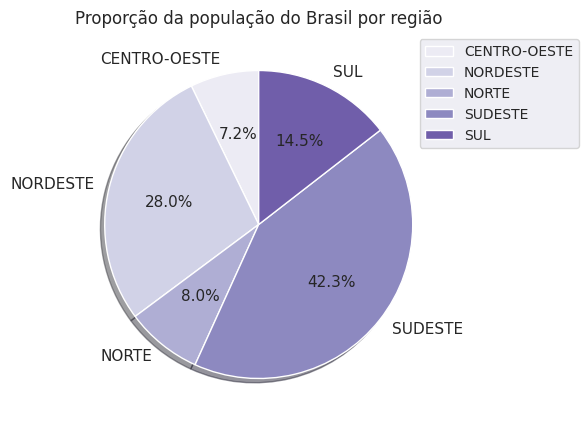

In [ ]:
# plotando o grafico !.
explode = [0.01, 0.01, 0.01, 0.01, 0.01]

with sns.axes_style('dark'):
  fig , axis = plt.subplots(figsize=(8,5))
  fig = plt.pie(
      data=populacao_por_regiao,
      x=populacao_por_regiao,
      labels=populacao_por_regiao.index,
      autopct='%1.1f%%',
      colors=sns.color_palette('Purples'),
      textprops={'fontsize': 11},
      #explode = explode,
      shadow=True,
      startangle=90,

      )
  plt.title('Proporção da população do Brasil por região')
  plt.legend(bbox_to_anchor=(0.9, 1))

  plt.show()
